<a href="https://colab.research.google.com/github/Mac98M/MachineLearning2024_DrAliyari_KNTUCourse/blob/main/HomeWorks/HW1/Code/masihmokhtari_ml_miniproj1_Q3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Masih Mokhtari _ Miniproj1**
**Q3**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import sklearn
import joblib
import os
#import mlxtend

from sklearn.datasets import make_classification , make_blobs , make_circles
from sklearn.linear_model import LogisticRegression , SGDClassifier
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, precision_recall_curve, auc
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

from mlxtend.plotting import plot_decision_regions

from mlxtend.plotting import plot_decision_regions

from imblearn.over_sampling import SMOTE

from IPython.display import clear_output

import seaborn as sns

from scipy.io import whosmat
from scipy.io import loadmat
from scipy import stats


In [ ]:
import warnings

# Disable all warnings
warnings.filterwarnings("ignore")

## 3-1 Download dataset

In [ ]:
'''
# address : https://drive.google.com/file/d/12mfsiKzoPhSXlV6IOFOo-EuhLmK6xTH7/view?usp=sharing
!pip install --upgrade --no-cache-dir gdown
!gdown 12mfsiKzoPhSXlV6IOFOo-EuhLmK6xTH7
! pip install kaggle
! mkdir ~/.kaggle
!cp /content/kaggle.json ~/.kaggle/kaggle.json
! chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d budincsevity/szeged-weather
!unzip -q /content/szeged-weather.zip -d /content/
'''

'\n# address : https://drive.google.com/file/d/12mfsiKzoPhSXlV6IOFOo-EuhLmK6xTH7/view?usp=sharing\n!pip install --upgrade --no-cache-dir gdown\n!gdown 12mfsiKzoPhSXlV6IOFOo-EuhLmK6xTH7\n! pip install kaggle\n! mkdir ~/.kaggle\n!cp /content/kaggle.json ~/.kaggle/kaggle.json\n! chmod 600 ~/.kaggle/kaggle.json\n!kaggle datasets download -d budincsevity/szeged-weather\n!unzip -q /content/szeged-weather.zip -d /content/\n'

In [ ]:
# Address : https://drive.google.com/file/d/1w6LJFeuxdK9LIkQLzcI_L84u3Kq-xubK/view?usp=drive_link
!pip install --upgrade --no-cache-dir gdown
!gdown 1w6LJFeuxdK9LIkQLzcI_L84u3Kq-xubK

  Attempting uninstall: gdown
    Found existing installation: gdown 4.7.3
    Uninstalling gdown-4.7.3:
      Successfully uninstalled gdown-4.7.3
Downloading...
From: https://drive.google.com/uc?id=1w6LJFeuxdK9LIkQLzcI_L84u3Kq-xubK
To: /content/weatherHistory.csv
100% 16.3M/16.3M [00:00<00:00, 46.4MB/s]


## 3-2 Load and Prepare Dataset

In [ ]:
df = pd.read_csv('weatherHistory.csv')
df.head()
#df.sample()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [ ]:
df.sample(8)

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
78532,2014-09-22 07:00:00.000 +0200,Mostly Cloudy,rain,16.138889,16.138889,0.93,3.1073,227.0,10.2557,0.0,1008.61,Mostly cloudy throughout the day.
17435,2007-09-05 11:00:00.000 +0200,Overcast,rain,9.005556,6.561111,0.90,16.1322,302.0,10.8031,0.0,1011.09,Mostly cloudy throughout the day.
37657,2010-02-23 01:00:00.000 +0100,Overcast,rain,6.155556,4.633333,0.92,7.5187,152.0,6.1985,0.0,1004.07,Mostly cloudy throughout the day.
54876,2012-02-11 12:00:00.000 +0100,Overcast,snow,-12.222222,-18.855556,0.73,12.8800,10.0,4.8300,0.0,1029.30,Foggy starting overnight continuing until morn...
63629,2013-02-10 05:00:00.000 +0100,Foggy,snow,-1.183333,-5.016667,1.00,11.1895,0.0,1.8837,0.0,1011.00,Foggy in the morning.
20786,2008-01-22 02:00:00.000 +0100,Partly Cloudy,rain,1.755556,-1.400000,0.95,10.8514,173.0,5.0393,0.0,1012.56,Mostly cloudy throughout the day and breezy st...
72076,2014-12-27 04:00:00.000 +0100,Mostly Cloudy,snow,-1.844444,-8.122222,0.68,23.9729,320.0,14.9569,0.0,1019.28,Mostly cloudy overnight.
74627,2014-06-13 14:00:00.000 +0200,Mostly Cloudy,rain,28.483333,27.944444,0.38,18.8370,290.0,10.5777,0.0,1013.96,Partly cloudy throughout the day.


In [ ]:
total =df.isnull().sum().sort_values(ascending = False)
percent =(df.isnull().sum()/len(df)).sort_values(ascending = False)
missing_data = pd.concat([total, percent], axis = 1, keys = ['Total', 'Percent'])
missing_data

,Total,Percent
Precip Type,517,0.00536
Formatted Date,0,0.00000
Summary,0,0.00000
Temperature (C),0,0.00000
Apparent Temperature (C),0,0.00000
Humidity,0,0.00000
Wind Speed (km/h),0,0.00000
Wind Bearing (degrees),0,0.00000
Visibility (km),0,0.00000
Loud Cover,0,0.00000


In [ ]:
#Delete columns by name with df.drop()
data_new = df.drop(["Formatted Date", "Loud Cover","Summary","Precip Type","Daily Summary"], # Cols to drop
            axis = 1)       # 1 for columns
data_new.head()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
0,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13
1,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63
2,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94
3,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41
4,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51


In [ ]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Temperature (C)           96453 non-null  float64
 1   Apparent Temperature (C)  96453 non-null  float64
 2   Humidity                  96453 non-null  float64
 3   Wind Speed (km/h)         96453 non-null  float64
 4   Wind Bearing (degrees)    96453 non-null  float64
 5   Visibility (km)           96453 non-null  float64
 6   Pressure (millibars)      96453 non-null  float64
dtypes: float64(7)
memory usage: 5.2 MB


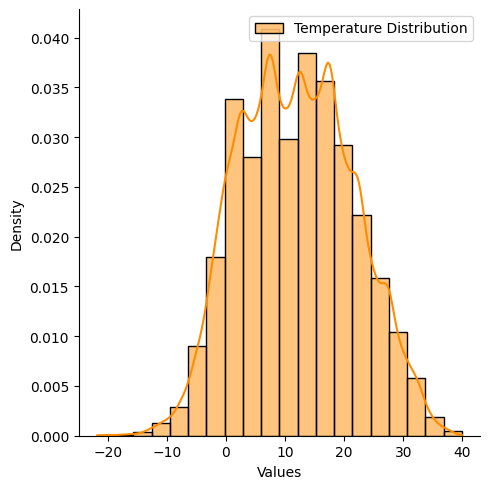

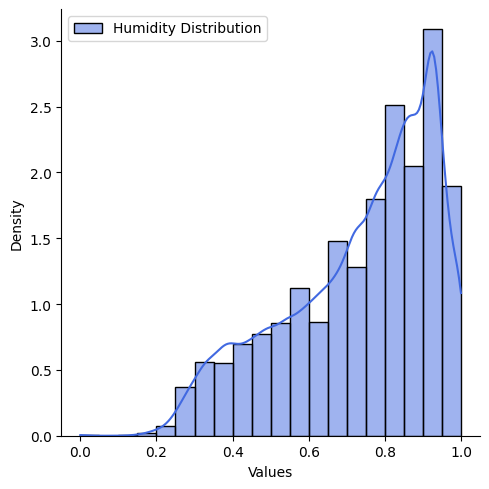

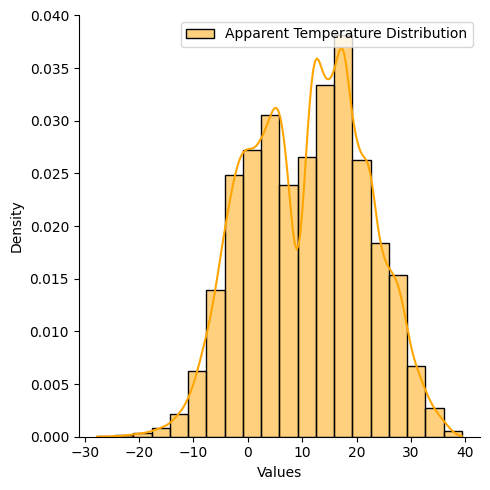

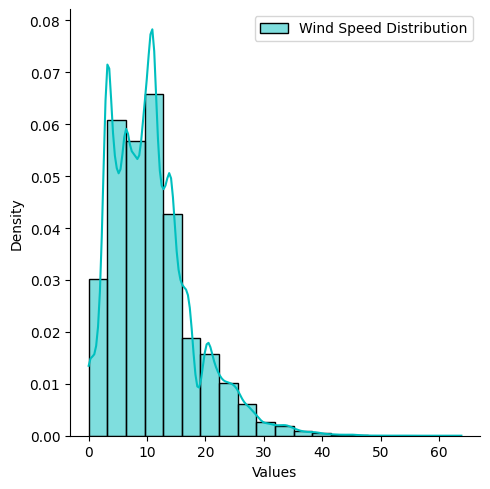

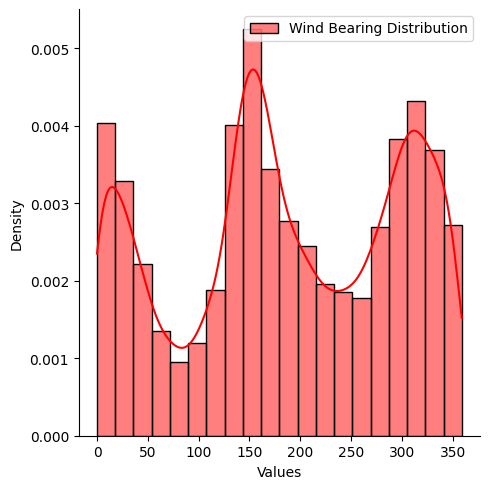

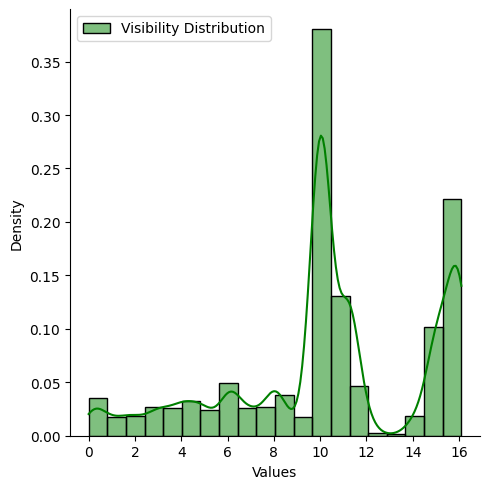

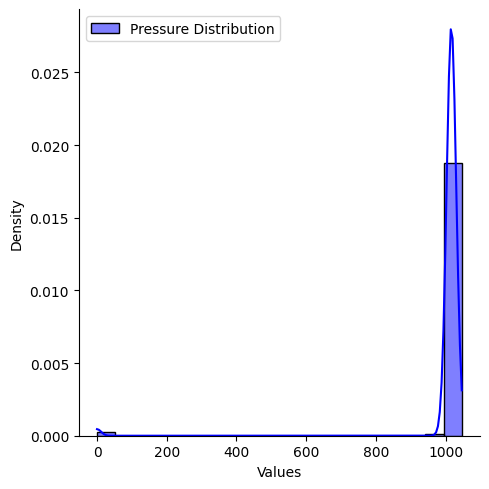

In [ ]:
# Plotting the distribution using seaborn
sns.displot(data=df, x=df["Temperature (C)"], kde=True, color='darkorange', label='Temperature Distribution', bins = 20, stat="density")
plt.xlabel('Values')
plt.ylabel('Density')
plt.legend()
sns.displot(data=df, x=df["Humidity"], kde=True, color='royalblue', label='Humidity Distribution', bins = 20, stat="density" )
plt.xlabel('Values')
plt.ylabel('Density')
plt.legend()
sns.displot(data=df, x=df["Apparent Temperature (C)"], kde=True, color='orange', label='Apparent Temperature Distribution', bins = 20, stat="density")
plt.xlabel('Values')
plt.ylabel('Density')
plt.legend()
sns.displot(data=df, x=df["Wind Speed (km/h)"], kde=True, color='c', label='Wind Speed Distribution', bins = 20, stat="density")
plt.xlabel('Values')
plt.ylabel('Density')
plt.legend()
sns.displot(data=df, x=df["Wind Bearing (degrees)"], kde=True, color='r', label='Wind Bearing Distribution', bins = 20, stat="density")
plt.xlabel('Values')
plt.ylabel('Density')
plt.legend()
sns.displot(data=df, x=df["Visibility (km)"], kde=True, color='g', label='Visibility Distribution', bins = 20, stat="density")
plt.xlabel('Values')
plt.ylabel('Density')
plt.legend()
sns.displot(data=df, x=df["Pressure (millibars)"], kde=True, color='b', label='Pressure Distribution', bins = 20, stat="density")
plt.xlabel('Values')
plt.ylabel('Density')
plt.legend()

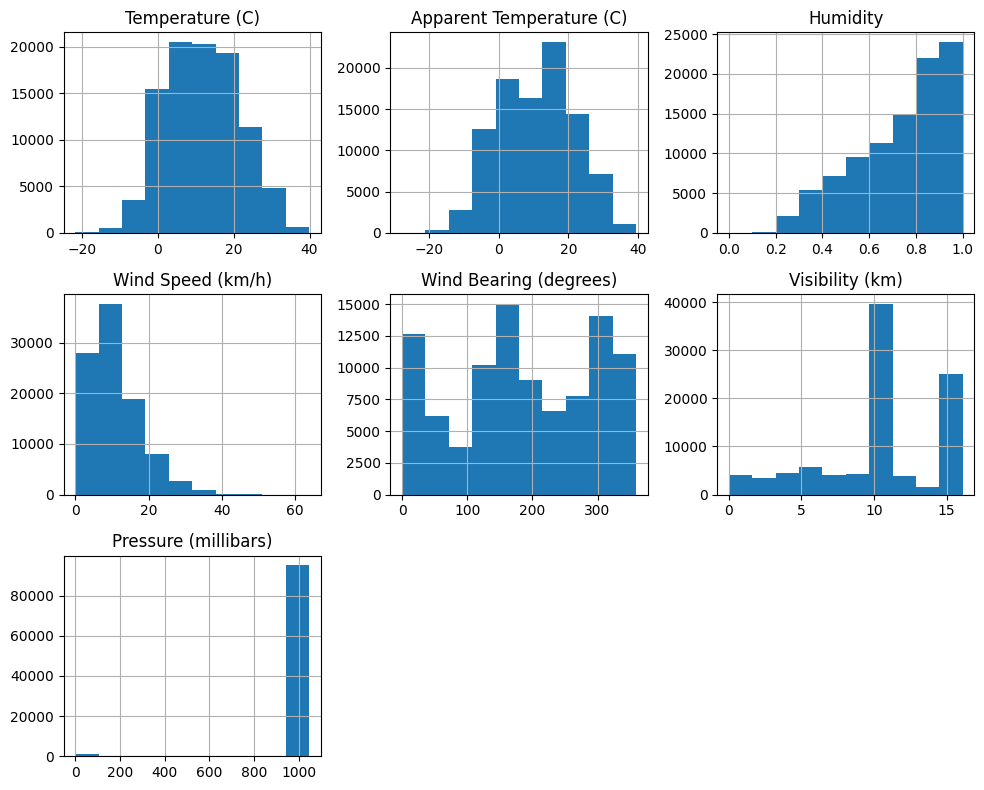

In [ ]:
# Plot distribution for each column
data_new.hist(figsize=(10, 8))
plt.tight_layout()
plt.show()

Correlation Matrix:
                          Temperature (C)  Apparent Temperature (C)  Humidity  \
Temperature (C)                  1.000000                  0.992629 -0.632255   
Apparent Temperature (C)         0.992629                  1.000000 -0.602571   
Humidity                        -0.632255                 -0.602571  1.000000   
Wind Speed (km/h)                0.008957                 -0.056650 -0.224951   
Wind Bearing (degrees)           0.029988                  0.029031  0.000735   
Visibility (km)                  0.392847                  0.381718 -0.369173   
Pressure (millibars)            -0.005447                 -0.000219  0.005454   

                          Wind Speed (km/h)  Wind Bearing (degrees)  \
Temperature (C)                    0.008957                0.029988   
Apparent Temperature (C)          -0.056650                0.029031   
Humidity                          -0.224951                0.000735   
Wind Speed (km/h)                  1.000000    

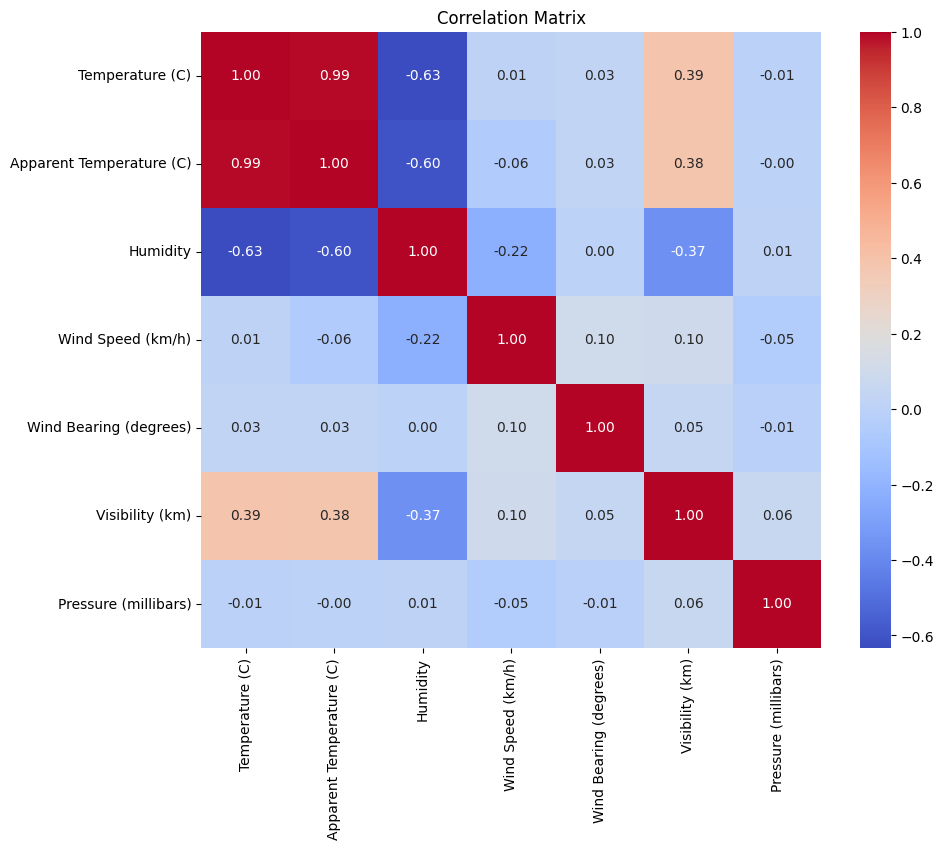

In [ ]:
# Compute the correlation matrix
correlation_matrix = data_new.corr()

# Print or display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Optionally, visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

features=["Temperature (C)", "Apparent Temperature (C)", "Humidity", "Wind Speed (km/h)", "Wind Bearing (degrees)", "Visibility (km)", "Pressure (millibars)"]

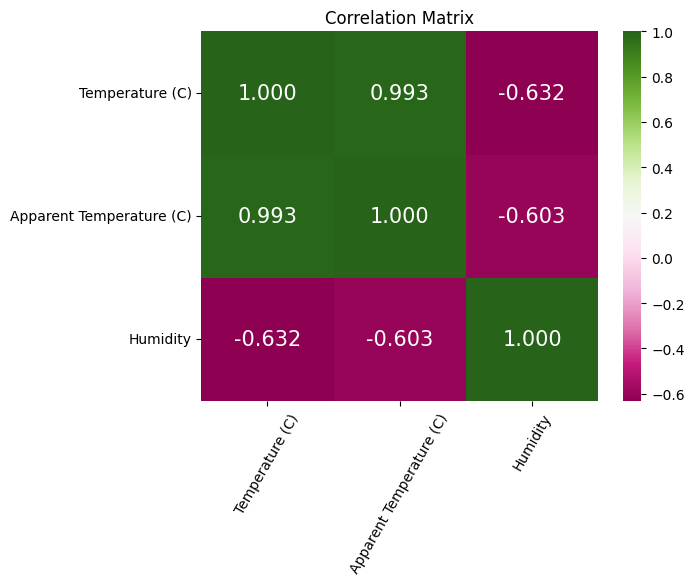

In [ ]:
# Draw Heatmap
# plt.figure(figsize=(8, 6))
sns.heatmap(data_new[[ 'Temperature (C)', 'Apparent Temperature (C)', 'Humidity']].corr(),
            annot=True, annot_kws={"fontsize":15}, cmap="PiYG", fmt='.3f')
plt.title('Correlation Matrix')
plt.xticks(rotation=60)
plt.show()

<Figure size 640x480 with 0 Axes>

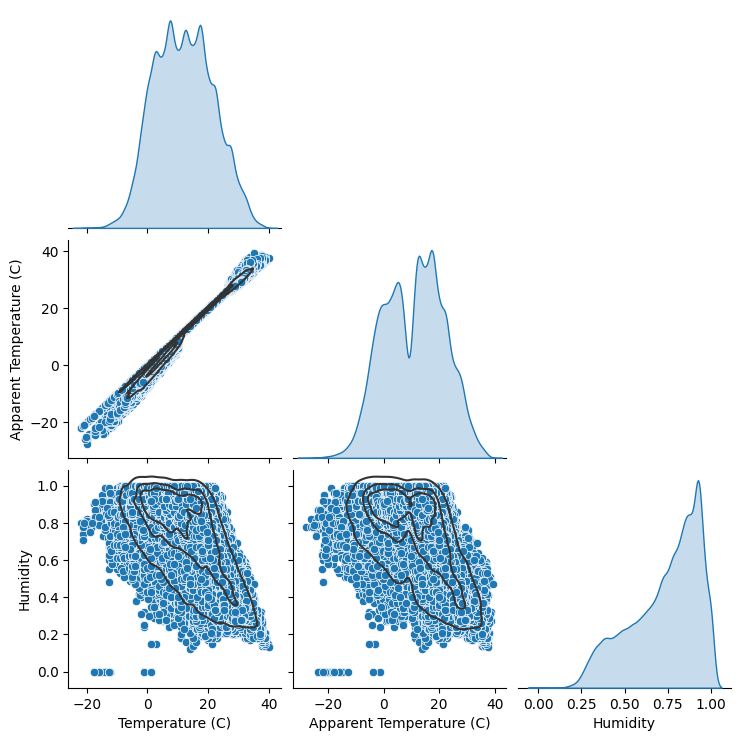

In [ ]:
plt.figure()
histo = sns.pairplot(df, vars=['Temperature (C)', 'Apparent Temperature (C)', 'Humidity'],
             corner=True, diag_kind='kde')
histo.map_lower(sns.kdeplot, levels=4, color=".2")

In [ ]:
np.random.seed(54)
df_train = df.sample(frac=0.995)
df_test = df[~ df.isin(df_train)].dropna()

## 3-3 Impleament model

### 3-3-1 LS

In [ ]:
features=["Temperature (C)", "Apparent Temperature (C)", "Humidity", "Wind Speed (km/h)", "Wind Bearing (degrees)", "Visibility (km)", "Pressure (millibars)"]
Outputs =["Temperature (C)", "Apparent Temperature (C)"]

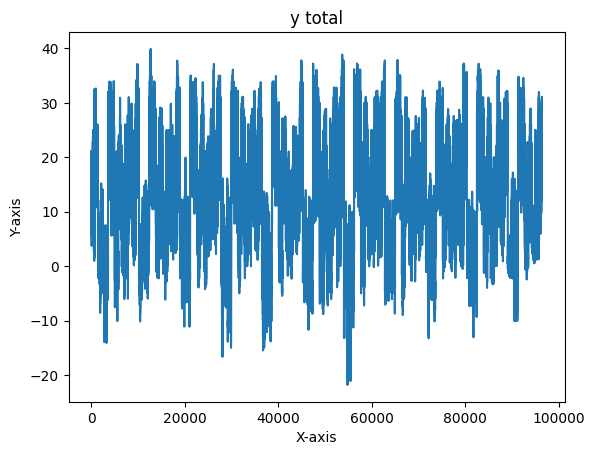

Parameter 'a': [0.99263465]
Parameter 'b': [0.]
Mean squared normalized error train: 0.014676448737728436


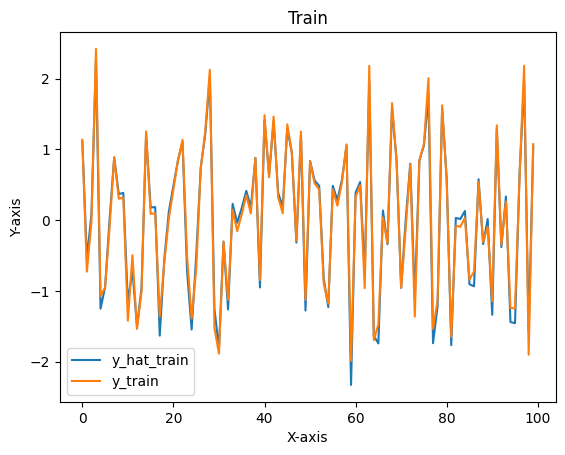

Mean squared normalized error: 0.014613814075593964


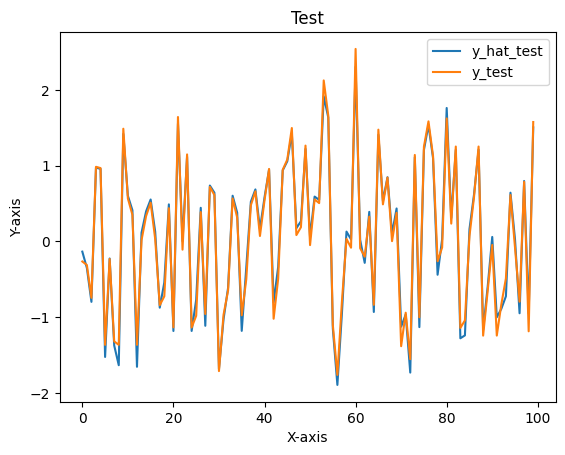

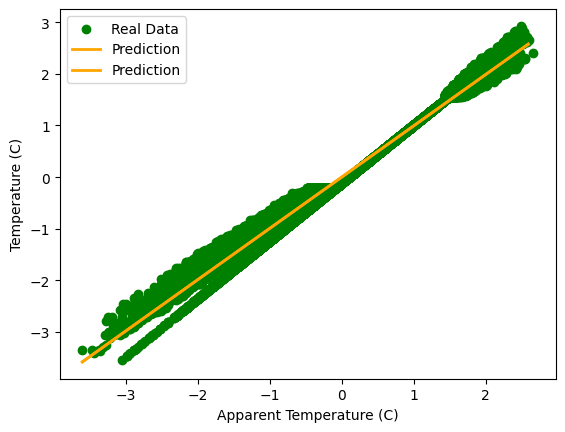

In [ ]:
random_state = 54
'''
features=[1:"Temperature (C)", 2:"Apparent Temperature (C)", 3:"Humidity", 4:"Wind Speed (km/h)", 5:"Wind Bearing (degrees)", 6:"Visibility (km)", 7:"Pressure (millibars)"]
Outputs =[1:"Temperature (C)", 2:"Apparent Temperature (C)"]
'''
f = 2 # f1 : Temperature (C), f2 : Apparent Temperature (C), f3 :Humidity
o = 1
x=data_new[features[f-1]].to_numpy()
y=data_new[Outputs[o-1]].to_numpy()
X = np.column_stack((x, np.ones_like(x)))  # Design matrix with columns [x, 1]

plt.plot( y, label='y')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('y total')
plt.show()

# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)

# Normalization
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
y_train  = scaler.fit_transform(y_train.reshape(-1,1))
y_test = scaler.transform(y_test.reshape(-1,1))

# Step 4: Compute Parameters
theta = np.linalg.lstsq(x_train,y_train, rcond=None)[0]  # LS estimation

# Extract parameters
a, b = theta

# Print the parameters
print("Parameter 'a':", a)
print("Parameter 'b':", b)

y_hat_train=x_train@theta
e = y_train - y_hat_train
mse = np.mean(np.square(e))
print("Mean squared normalized error train:", mse)

# Create a plot
plt.plot( y_hat_train[0:100], label='y_hat_train')
plt.plot( y_train[0:100], label='y_train')

# Add labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Train')
plt.legend()
plt.show()


y_hat_test=x_test@theta
e = y_test - y_hat_test
mse = np.mean(np.square(e))
print("Mean squared normalized error:", mse)

# Create a plot
plt.plot( y_hat_test[0:100], label='y_hat_test')
plt.plot( y_test[0:100], label='y_test')

# Add labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Test')
plt.legend()
plt.show()


x=data_new[features[f-1]].to_numpy()
y=data_new[Outputs[o-1]].to_numpy()

scaler = StandardScaler()
x = scaler.fit_transform(x.reshape(-1,1))
y = scaler.fit_transform(y.reshape(-1,1))

t = np.arange( np.min(x),np.max(x),0.1)
t = np.column_stack((t,t))

y_hat=t@theta
# Plot
plt.figure()
plt.scatter(x,y, c='green', label='Real Data')
plt.plot(t,y_hat, c='orange',linewidth=2, label='Prediction')
plt.xlabel(features[f-1])
plt.ylabel(Outputs[o-1])
plt.legend()

Mean squared normalized error train: 0.8438043457488195


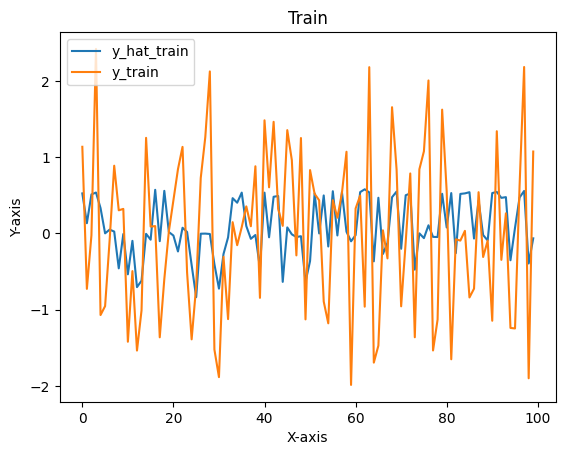

Mean squared normalized error: 0.840290742501787


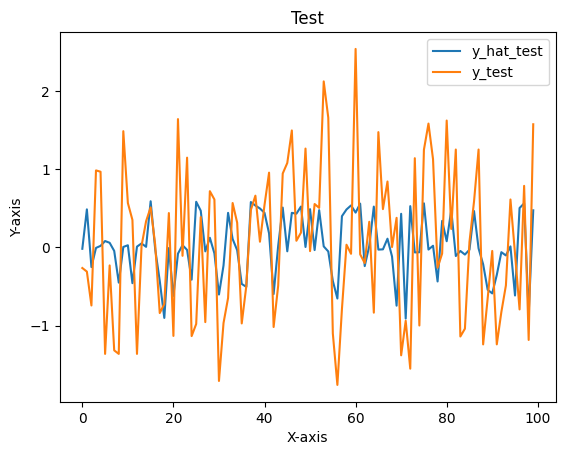

(96453, 2)


"\n#y_hat=t@theta\n# Plot\nplt.figure()\nplt.scatter(x[:,0],y, c='green', label='Real Data')\nplt.plot(t,y_hat, c='orange',linewidth=2, label='Prediction')\nplt.xlabel(features[f2-1])\nplt.ylabel(Outputs[o-1])\nplt.legend()\n\n# Plot\nplt.figure()\nplt.scatter(x[:,1],y, c='green', label='Real Data')\nplt.plot(t,y_hat, c='orange',linewidth=2, label='Prediction')\nplt.xlabel(features[f1-1])\nplt.ylabel(Outputs[o-1])\nplt.legend()\n"

In [ ]:
'''
features=[1:"Temperature (C)", 2:"Apparent Temperature (C)", 3:"Humidity", 4:"Wind Speed (km/h)", 5:"Wind Bearing (degrees)", 6:"Visibility (km)", 7:"Pressure (millibars)"]
Outputs =[1:"Temperature (C)", 2:"Apparent Temperature (C)"]
'''
f1 = 4 # f1 : Temperature (C), f2 : Apparent Temperature (C), f3 :Humidity
f2 = 5
f3 = 6
f4 = 2
o = 1
x=data_new[[features[f1-1],features[f2-1],features[f3-1]]].to_numpy()
y=data_new[Outputs[o-1]].to_numpy()
X = np.column_stack((x, np.ones_like(x)))  # Design matrix with columns [x, 1]

# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
y_train  = scaler.fit_transform(y_train.reshape(-1,1))
y_test = scaler.transform(y_test.reshape(-1,1))

# Step 4: Compute Parameters
theta = np.linalg.lstsq(x_train,y_train, rcond=None)[0]  # LS estimation

# Extract parameters
#a, b, c ,d = theta
a, b, c ,d, e , f = theta

# Print the parameters
#print("Parameter 'a':", a)
#print("Parameter 'b':", b)
#print("Parameter 'c':", c)
#print("Parameter 'd':", d)

y_hat_train=x_train@theta
e = y_train - y_hat_train
mse = np.mean(np.square(e))
print("Mean squared normalized error train:", mse)

# Create a plot
plt.plot( y_hat_train[0:100], label='y_hat_train')
plt.plot( y_train[0:100], label='y_train')

# Add labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Train')
plt.legend()
plt.show()

y_hat_test=x_test@theta
e = y_test - y_hat_test
mse = np.mean(np.square(e))
print("Mean squared normalized error:", mse)

# Create a plot
plt.plot( y_hat_test[0:100], label='y_hat_test')
plt.plot( y_test[0:100], label='y_test')

# Add labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Test')
plt.legend()
plt.show()

x=data_new[[features[f1-1],features[f2-1]]].to_numpy()
print(x.shape)
y=data_new[Outputs[o-1]].to_numpy()

scaler = StandardScaler()
x = scaler.fit_transform(x.reshape(-1,2))
y = scaler.fit_transform(y.reshape(-1,1))

t = np.arange( np.min(x),np.max(x),0.1)
t = np.column_stack((t,t))
t = np.column_stack((t,t))

'''
#y_hat=t@theta
# Plot
plt.figure()
plt.scatter(x[:,0],y, c='green', label='Real Data')
plt.plot(t,y_hat, c='orange',linewidth=2, label='Prediction')
plt.xlabel(features[f2-1])
plt.ylabel(Outputs[o-1])
plt.legend()

# Plot
plt.figure()
plt.scatter(x[:,1],y, c='green', label='Real Data')
plt.plot(t,y_hat, c='orange',linewidth=2, label='Prediction')
plt.xlabel(features[f1-1])
plt.ylabel(Outputs[o-1])
plt.legend()
'''

### 3-3-2 RLS

In [ ]:
scaler = StandardScaler()

In [ ]:
class RecursiveLeastSquares:
    def __init__(self, n_features, forgetting_factor=0.99):
        self.n_features = n_features
        self.forgetting_factor = forgetting_factor
        self.theta = np.zeros((n_features, 1))  # Initialize model parameters
        self.P = np.eye(n_features)  # Initialize covariance matrix

    def fit(self, X, y):
        errors = []
        for i in range(len(X)):
            x_i = X[i].reshape(-1, 1)
            y_i = y[i]

            # Predict
            y_pred = np.dot(x_i.T, self.theta)

            # Update
            error = y_i - y_pred
            errors.append(error)
            K = np.dot(self.P, x_i) / (self.forgetting_factor + np.dot(np.dot(x_i.T, self.P), x_i))
            self.theta = self.theta + np.dot(K, error)
            self.P = (1 / self.forgetting_factor) * (self.P - np.dot(K, np.dot(x_i.T, self.P)))

        return errors

    def predict(self, X):
        return np.dot(X, self.theta)

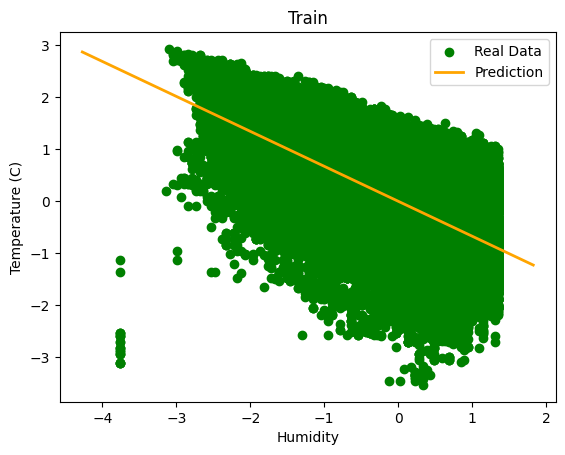

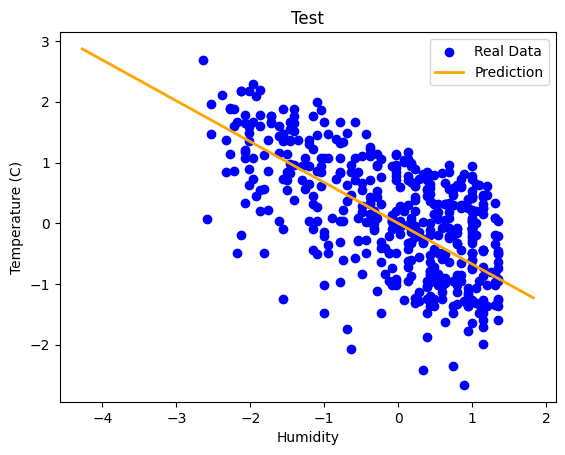

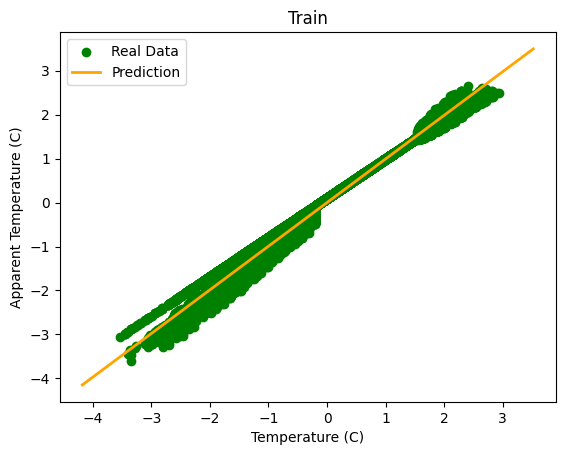

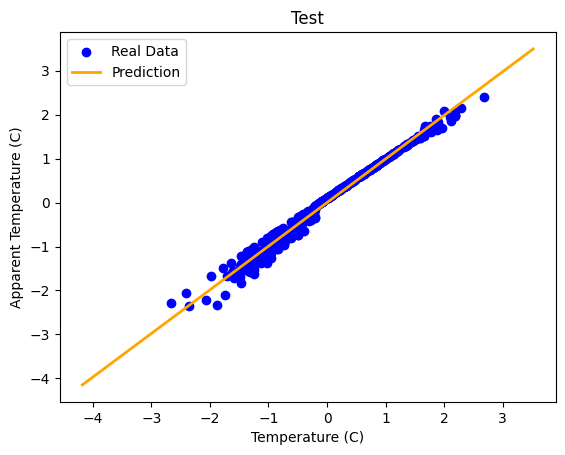

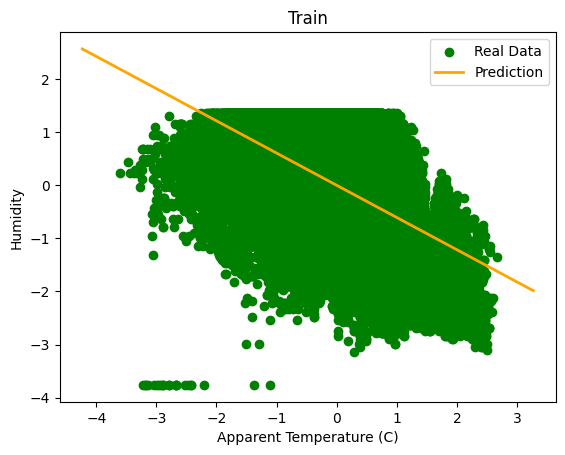

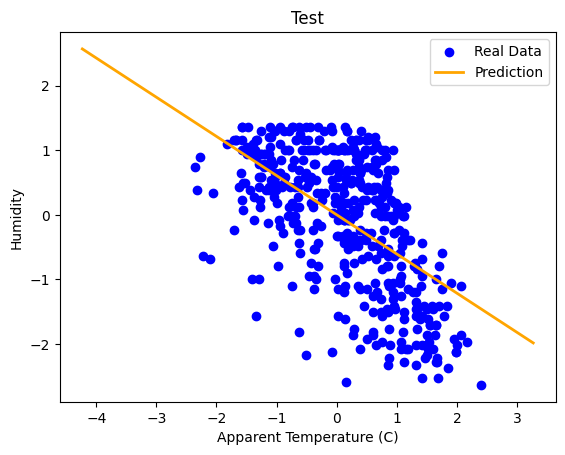

In [ ]:
vars = ['Temperature (C)', 'Apparent Temperature (C)', 'Humidity']
rls_models = {}
metrices = {}

for i,v in enumerate(vars):

    # Input of model
    input = df_train[vars[i-1]].values
    output = df_train[v].values
    input_test = df_test[vars[i-1]].values
    output_test = df_test[v].values
    # Nomalizing values
    input = scaler.fit_transform(input.reshape(-1,1))
    input_test = scaler.transform(input_test.reshape(-1,1))
    output  = scaler.fit_transform(output.reshape(-1,1))
    output_test = scaler.transform(output_test.reshape(-1,1))
    # continus variable
    in_range = np.max(input) - np.min(input)
    t = np.arange(
        np.min(input)-0.1*in_range,
        np.max(input)+0.1*in_range,
        0.1
    )
    # Model fitting
    rls = RecursiveLeastSquares(n_features=1,forgetting_factor=0.999)
    rls.fit(input,output)
    rls_models[v] = rls # Save all LS models
    hat = rls.predict(t.reshape(-1,1))
    # Plot Train
    plt.figure()
    plt.scatter(input, output, c='green', label='Real Data')
    plt.plot(t,hat, c='orange',linewidth=2, label='Prediction')
    plt.title('Train')
    plt.ylabel(v)
    plt.xlabel(vars[i-1])
    plt.legend()
    # Plot Test
    plt.figure()
    plt.scatter(input_test, output_test, c='blue', label='Real Data')
    plt.plot(t,hat, c='orange',linewidth=2, label='Prediction')
    plt.title('Test')
    plt.ylabel(v)
    plt.xlabel(vars[i-1])
    plt.legend()

    # Matrices
    mse = mean_squared_error(rls.predict(input),output)
    mse_test = mean_squared_error(rls.predict(input_test),output_test)
    mae = mean_absolute_error(rls.predict(input),output)
    mae_test = mean_absolute_error(rls.predict(input_test),output_test)
    metrices[v] = {'MSE Train':mse, 'MSE Test':mse_test, 'MAE Train':mae, 'MAE Test':mae_test}

In [ ]:
features=["Temperature (C)", "Apparent Temperature (C)", "Humidity", "Wind Speed (km/h)", "Wind Bearing (degrees)", "Visibility (km)", "Pressure (millibars)"]
Outputs =["Temperature (C)", "Apparent Temperature (C)"]

Mean squared normalized error: 0.016095728420303046
0.016095728420303046


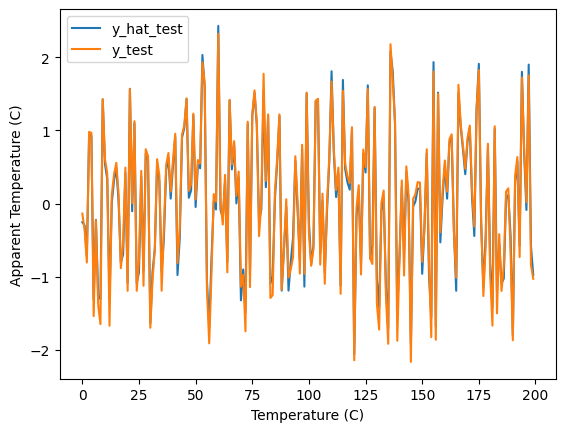

In [ ]:
random_state=54
# Initialize
'''
features=[1:"Temperature (C)", 2:"Apparent Temperature (C)", 3:"Humidity", 4:"Wind Speed (km/h)", 5:"Wind Bearing (degrees)", 6:"Visibility (km)", 7:"Pressure (millibars)"]
Outputs =[1:"Temperature (C)", 2:"Apparent Temperature (C)"]
'''
f = 1 # f1 : Temperature (C), f2 : Apparent Temperature (C), f3 :Humidity
o = 2
x=data_new[features[f-1]].to_numpy()
y=data_new[Outputs[o-1]].to_numpy()
X = np.column_stack((x, np.ones_like(x)))  # Design matrix with columns [x, 1]

# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.05,random_state=random_state)
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
y_train  = scaler.fit_transform(y_train.reshape(-1,1))
y_test = scaler.transform(y_test.reshape(-1,1))

n = X.shape[1]
a = 1e1
P = a * np.eye(n)
tetta = np.zeros((n, len(x_train)+1))
forgetting_factor=0.9999

# RLS algorithm
for k in range(len(x_train)):
  gama =( P @ (x_train[k].T) )/ (forgetting_factor + x_train[k] @ P @ (x_train[k].T))
  P_new = (P - (gama @ P @ x_train[k]))*(1/forgetting_factor)
  tetta[:, k+1] = tetta[:, k] + gama * (y_train[k] - x_train[k] @ tetta[:, k])
  P = P_new
  P_eig = np.linalg.eigvals(P_new)

# Test
y_hat_test = x_test @ tetta[:, -1]
e = y_test - y_hat_test.reshape(-1,1)
mse = np.mean(np.square(e))
print("Mean squared normalized error:", mse)
mse2 = mean_squared_error(y_test, y_hat_test)
print(mse2)

# Create a plot
plt.plot( y_hat_test[0:200], label='y_hat_test')
plt.plot( y_test[0:200], label='y_test')

# Add labels and title
plt.xlabel(features[f-1])
plt.ylabel(Outputs[o-1])
plt.legend()
plt.show()


### 3-3-3 WLS

In [ ]:
features=["Temperature (C)", "Apparent Temperature (C)", "Humidity", "Wind Speed (km/h)", "Wind Bearing (degrees)", "Visibility (km)", "Pressure (millibars)"]
Outputs =["Temperature (C)", "Apparent Temperature (C)"]

                            WLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.154
Model:                            WLS   Adj. R-squared:                  0.154
Method:                 Least Squares   F-statistic:                 1.672e+04
Date:                Fri, 12 Apr 2024   Prob (F-statistic):               0.00
Time:                        15:16:24   Log-Likelihood:            -1.2234e+05
No. Observations:               91630   AIC:                         2.447e+05
Df Residuals:                   91628   BIC:                         2.447e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.666e-13      0.003  -1.21e-10      1.0

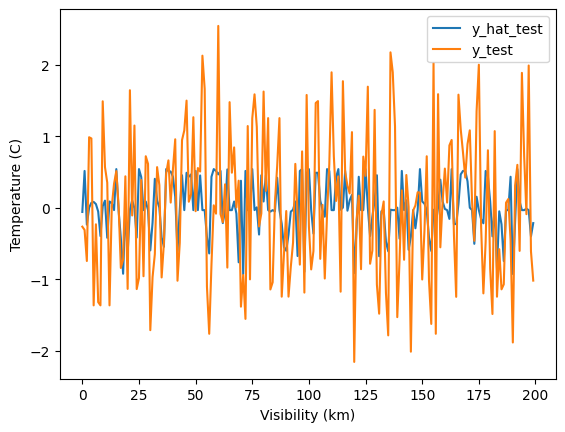

In [ ]:
import statsmodels.api as sm
random_state = 54
'''
features=[1:"Temperature (C)", 2:"Apparent Temperature (C)", 3:"Humidity", 4:"Wind Speed (km/h)", 5:"Wind Bearing (degrees)", 6:"Visibility (km)", 7:"Pressure (millibars)"]
Outputs =[1:"Temperature (C)", 2:"Apparent Temperature (C)"]
'''
f = 6 # f1 : Temperature (C), f2 : Apparent Temperature (C), f3 :Humidity
o = 2
# Initialize
x=data_new[features[f-1]].to_numpy()
y=data_new[Outputs[o-1]].to_numpy()
X = np.column_stack((x, np.ones_like(x)))  # Design matrix with columns [x, 1]

# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.05 , random_state =random_state )
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
y_train  = scaler.fit_transform(y_train.reshape(-1,1))
y_test = scaler.transform(y_test.reshape(-1,1))

weights = 1 / np.var(y_train)
# Fit the WLS model
X_with_intercept = sm.add_constant(x_train)  # Add constant term for intercept
model = sm.WLS(y_train, X_with_intercept, weights=weights)
results = model.fit()

# Print summary
print(results.summary())

# Add constant term for intercept
X_with_intercept = sm.add_constant(x_test)
y_hat_test=results.predict(X_with_intercept)


# Test
# y_hat_test = x_test @ tetta[:, -1]
e = y_test - y_hat_test.reshape(-1,1)
mse = np.mean(np.square(e))
print("Mean squared normalized error:", mse)
mse2 = mean_squared_error(y_test, y_hat_test)
print(mse2)

# Create a plot
plt.plot( y_hat_test[0:200], label='y_hat_test')
plt.plot( y_test[0:200], label='y_test')

# Add labels and title
plt.xlabel(features[f-1])
plt.ylabel(Outputs[o-1])
plt.legend()
plt.show()

x=data_new[features[f-1]].to_numpy()
y=data_new[Outputs[o-1]].to_numpy()

scaler = StandardScaler()
x = scaler.fit_transform(x.reshape(-1,1))
y = scaler.fit_transform(y.reshape(-1,1))

t = np.arange( np.min(x),np.max(x),0.1)
t = np.column_stack((t,t))

                            WLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.986
Model:                            WLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                 3.311e+06
Date:                Fri, 12 Apr 2024   Prob (F-statistic):               0.00
Time:                        13:25:55   Log-Likelihood:                 66719.
No. Observations:               91630   AIC:                        -1.334e+05
Df Residuals:                   91627   BIC:                        -1.334e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       8.923e-15      0.000   2.31e-11      1.0

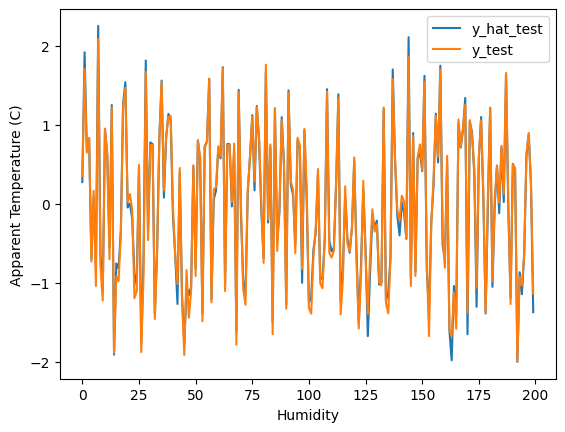

In [ ]:
# @title WLS Apparent Temperature (C) forecast using Humidity and Temperature (C)
import statsmodels.api as sm
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error
random_state=14
# Initialize
x=data_new[["Temperature (C)","Humidity"]].to_numpy()
y=data_new["Apparent Temperature (C)"].to_numpy()
X = np.column_stack((x, np.ones_like(x)))  # Design matrix with columns [x, 1]

# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.05)
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
y_train  = scaler.fit_transform(y_train.reshape(-1,1))
y_test = scaler.transform(y_test.reshape(-1,1))

weights = 1 / np.var(y_train)

# Fit the WLS model
X_with_intercept = sm.add_constant(x_train)  # Add constant term for intercept
model = sm.WLS(y_train, X_with_intercept, weights=weights)
results = model.fit()

# Print summary
print(results.summary())

# Add constant term for intercept
X_with_intercept = sm.add_constant(x_test)
y_hat_test=results.predict(X_with_intercept)

# Test
# y_hat_test = x_test @ tetta[:, -1]
e = y_test - y_hat_test.reshape(-1,1)
mse = np.mean(np.square(e))
print("Mean squared normalized error:", mse)
mse2 = mean_squared_error(y_test, y_hat_test)
print(mse2)

# Create a plot
plt.plot( y_hat_test[0:200], label='y_hat_test')
plt.plot( y_test[0:200], label='y_test')

# Add labels and title
plt.xlabel('Humidity')
plt.ylabel('Apparent Temperature (C)')
plt.legend()
plt.show()
